In [1]:
import pandas as pd
import numpy as np
import matplotlib.gridspec
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from adjustText import adjust_text

In [2]:
taiji_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/final_genes_all_sets_152.csv')
taiji_genes_set = set(taiji_genes['Genes'])

In [4]:
#Load in LogFCRNA
logfc_df = pd.read_csv('/ix3/djishnu/Alisa/Tfh/correct_direction_sign_change_rna_earlyvsGC_Thresh_log2FC.csv')

#Load in Taiji Outputs
atac_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/ATAC_RNA_processed.csv').set_index("Genes")
H3K4me1_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/H3K4me1_RNA_processed.csv').set_index("Genes")
H3K4me3_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/H3K4me3_RNA_processed.csv').set_index("Genes")
H3K27Ac_genes = pd.read_csv('/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/H3K27Ac_RNA_processed.csv').set_index("Genes")

# Subset to Taiji genes
dfs = [df.loc[df.index.intersection(taiji_genes_set)] for df in [atac_genes, H3K4me1_genes, H3K4me3_genes, H3K27Ac_genes]]

# Concatenate and compute mean across available values
average_df = pd.concat(dfs).groupby(level=0).mean()
average_df = average_df.reset_index()

In [10]:
merged_df = average_df.merge(logfc_df, on='Genes', how='left')
merged_df['Importance'] = np.log2(merged_df['GC'] / merged_df['Early Extra-GC TFH'])

merged_df = merged_df.set_index('Genes')
#merged_df = merged_df[~merged_df.index.str.startswith('ZNF')]

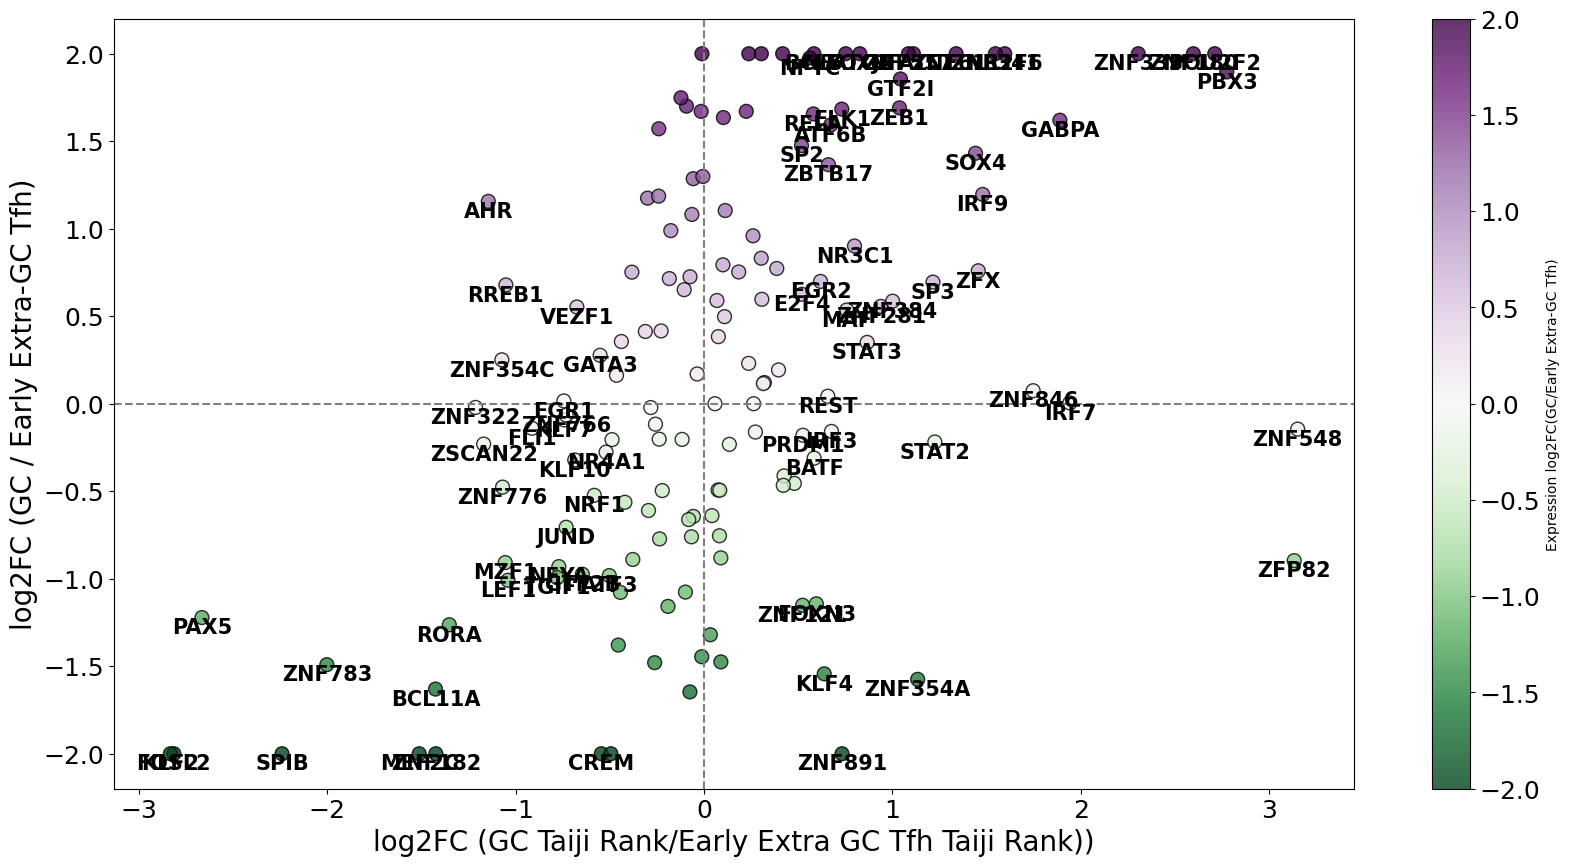

In [11]:
fig = plt.figure(figsize=(20,10))

sc = plt.scatter(
    merged_df['Importance'],
    merged_df['LogChange_Thresh'], 
    c=merged_df['LogChange_Thresh'],  
    cmap='PRGn_r',
    edgecolor='k',
    alpha=0.8,
    s=100
)

plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.ylabel('log2FC (GC / Early Extra-GC Tfh)', fontsize=20)
plt.xlabel('log2FC (GC Taiji Rank/Early Extra GC Tfh Taiji Rank))', fontsize=20)
#plt.title('Gene Roles in GC vs. Early Extra-GC TFH')

cbar = plt.colorbar(sc)
cbar.set_label('Expression log2FC(GC/Early Extra-GC Tfh)')

# Add bold, larger labels below selected points
for gene, row in merged_df.iterrows():
    if row['Importance'] >= 0.5 or row['Importance'] <= -0.5:
        plt.text(
            row['Importance'],
            row['LogChange_Thresh'], 
            gene,
            fontsize= 15,
            fontweight='bold',
            ha='center',
            va='top',
            alpha=1,
            
        )
        
plt.tick_params(axis='both', labelsize=18)

cbar.ax.tick_params(labelsize=18)

#plt.grid(True)
#plt.tight_layout()
#plt.show()

In [8]:
# Save as PNG
# fig.savefig("/ix/djishnu/Alisa/Tfh/ForPaper/processed_Taiji/GC_vs_Early_ImportancePlot_thresh_consistent_direction_newrank.png", dpi=300, bbox_inches='tight')

# Save as PDF
# fig.savefig("/ix/djishnu/Al#isa/Tfh/ForPaper/processed_Taiji/GC_vs_Early_ImportancePlot_thresh_consistent_direction_newrank.pdf", bbox_inches='tight')



In [12]:
merged_df

,Naive,Early Extra-GC TFH,Late Extra-GC TFH,GC,Unnamed: 0,LogChange,LogChange_Thresh,Importance
Genes,,,,,,,,
AHR,0.000219,0.001368,0.000897,0.000618,3325,1.156287,1.156287,-1.145080
ATF3,0.003381,0.005149,0.003232,0.003633,10835,-0.981861,-0.981861,-0.502994
ATF4,0.003664,0.002948,0.002073,0.003018,6003,-1.320194,-1.320194,0.033548
ATF6B,0.002663,0.001862,0.003427,0.002967,22672,1.592982,1.592982,0.672139
BATF,0.002066,0.002661,0.002101,0.003991,9950,-0.311239,-0.311239,0.584373
...,...,...,...,...,...,...,...,...
ZNF783,0.000535,0.000761,0.001890,0.000190,20129,-1.491148,-1.491148,-2.002115
ZNF846,0.002814,0.000518,0.001533,0.001739,17203,0.074388,0.074388,1.746672
ZNF891,0.000793,0.000359,0.001934,0.000597,22853,-3.028184,-2.000000,0.732174
